## Setting Directory

In [1]:
import os
os.chdir('D:\\data_Analytics_docs\\Machine_learning')
os.getcwd()

'D:\\data_Analytics_docs\\Machine_learning'

## Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier as dc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt


df_amit = pd.read_csv('cancer.csv')

In [3]:
df_amit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 683 non-null    int64
 1   Clump Thickness    683 non-null    int64
 2   UofCSize           683 non-null    int64
 3   UofCShape          683 non-null    int64
 4   Marginal Adhesion  683 non-null    int64
 5   SECSize            683 non-null    int64
 6   Bare Nuclei        683 non-null    int64
 7   Bland Chromatin    683 non-null    int64
 8   Normal Nucleoli    683 non-null    int64
 9   Mitoses            683 non-null    int64
 10  Class              683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [4]:
df_amit.isnull().sum()

id                   0
Clump Thickness      0
UofCSize             0
UofCShape            0
Marginal Adhesion    0
SECSize              0
Bare Nuclei          0
Bland Chromatin      0
Normal Nucleoli      0
Mitoses              0
Class                0
dtype: int64

## Separation of Data and Labels

In [5]:
X = df_amit.drop(['id','Class'], axis =1)
y = df_amit['Class']

## Training and Test sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, stratify = y, random_state = 1)

## Standardize the Data

In [7]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

## Hyperparameters

In [9]:
param_grid = [
{'penalty': ['l1','l2','elasticnet','none'],
 'C': np.logspace(-4,4,20),
 'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag','saga'],
 'max_iter':[100,1000,1500,5000]
  }
            ]

clf = GridSearchCV(model,param_grid, cv =3, verbose = True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)
prediction_test = best_clf.predict(X_test)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\Amit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Amit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Amit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Amit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Valu

In [10]:
best_clf.best_estimator_

LogisticRegression(C=0.012742749857031334, solver='liblinear')

## Accuracy of Model with Hyperparameter

In [11]:
score = accuracy_score(y_test, prediction_test )
print(score)

0.9689213893967094


## Precision Test

In [12]:
precision_test = precision_score(y_test, prediction_test, pos_label = 2)
precision_test

0.9829059829059829

## Recall Test 

In [13]:
recall_test = recall_score(y_test,prediction_test, pos_label = 2 )
recall_test

0.9691011235955056

## F1 Score

In [14]:
f1score_test = f1_score(y_test,prediction_test, pos_label = 2)
f1score_test

0.9759547383309758

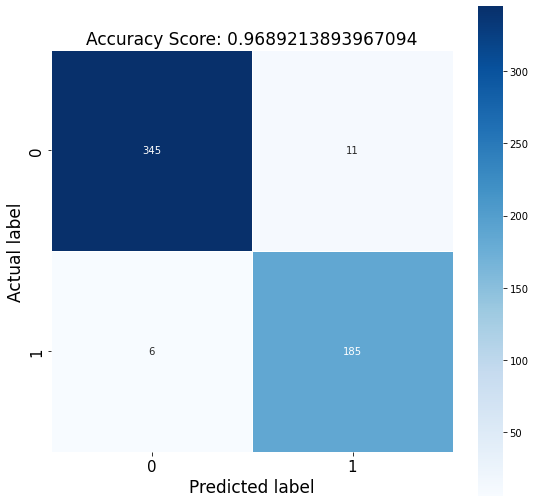

In [15]:
cm = metrics.confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

## Model Predictions and Accuracy on Training sets

In [16]:
model_predictions = model.predict(X_train)
model_predictions_accuracy = accuracy_score(model_predictions,y_train)
model_predictions_accuracy

0.9779411764705882

## Actual Predictions and Accuracy on Test sets

In [17]:
actual_predictions = model.predict(X_test)
actual_predictions_accuracy = accuracy_score(actual_predictions,y_test)
actual_predictions_accuracy



0.9597806215722121

## Making a Predictive System

In [18]:
#converting into a numpy array
input_data=(8,10,10,8,7,10,9,7,1)
i_d_as_nparray = np.asarray(input_data)
#reshape the numpy array as we are predicting for one instance
input_data_reshaped = i_d_as_nparray.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
if (prediction == 2):
 print('cancer cells')
else:
 print('Benign')

Benign
